In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#starting parameters
num_sides = 5
init_scale = 1

"""A single point has the following in initial attributes in our 2D model:
   Note that we are using 3d vectors to represent our 2d coords (homogeneous coords)
   These will allow us to use square matrices to compose transformations"""

# Position at the origin (0,0)
single_P = np.array([0,0,1])
# An initial normal pointing along the y axis)
single_N = np.array([0,1,1])

print "P: {0}".format(single_P)
print "N: {0}".format(single_N)

P: [0 0 1]
N: [0 1 1]


In [10]:
"""next up we will make an array of point normals, one for each vertex of our shape""" 

shape_pts_N = []

for i in range(num_sides+1):
    theta = i * np.radians(float(360)/num_sides)
    c,s = np.cos(theta), np.sin(theta)
    R = np.matrix([[c,s,0],[-s,c,0],[0,0,1]])
    vec = single_N *init_scale * R
    shape_pts_N.append(vec)

"""We will use this array to create a matrix of points, one for each vertex of our shape"""

shape_pts_P = np.array(shape_pts_N).reshape(num_sides+1,3)
print shape_pts_P

[[  0.00000000e+00   1.00000000e+00   1.00000000e+00]
 [ -9.51056516e-01   3.09016994e-01   1.00000000e+00]
 [ -5.87785252e-01  -8.09016994e-01   1.00000000e+00]
 [  5.87785252e-01  -8.09016994e-01   1.00000000e+00]
 [  9.51056516e-01   3.09016994e-01   1.00000000e+00]
 [  2.44929360e-16   1.00000000e+00   1.00000000e+00]]


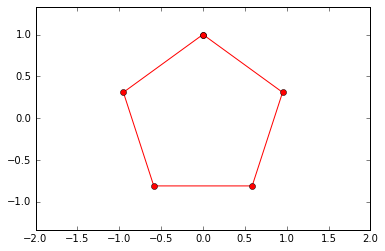

In [11]:
"""Now we can plot  our basic shape"""
plt.plot(shape_pts_P[:,0], shape_pts_P[:,1],'ro-')
plt.axis('equal')
plt.axis([-2,2,-2,2])
plt.show()

shape_pts_P:
[[  0.00000000e+00   1.00000000e+00   1.00000000e+00]
 [ -9.51056516e-01   3.09016994e-01   1.00000000e+00]
 [ -5.87785252e-01  -8.09016994e-01   1.00000000e+00]
 [  5.87785252e-01  -8.09016994e-01   1.00000000e+00]
 [  9.51056516e-01   3.09016994e-01   1.00000000e+00]
 [  2.44929360e-16   1.00000000e+00   1.00000000e+00]] 

shape_pts_flip:
[[ -1.22464680e-16  -1.00000000e+00   1.00000000e+00]
 [  9.51056516e-01  -3.09016994e-01   1.00000000e+00]
 [  5.87785252e-01   8.09016994e-01   1.00000000e+00]
 [ -5.87785252e-01   8.09016994e-01   1.00000000e+00]
 [ -9.51056516e-01  -3.09016994e-01   1.00000000e+00]
 [ -3.67394040e-16  -1.00000000e+00   1.00000000e+00]]


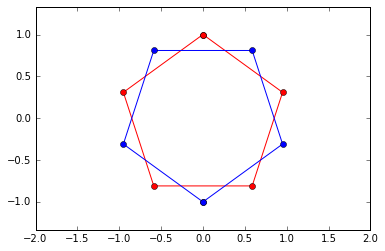

In [109]:
"""We duplicate and flip the shape"""
theta = np.radians(180)
c,s = np.cos(theta), np.sin(theta)
R = np.matrix([[c,s,0],[-s,c,0],[0,0,1]])
shape_pts_flip = shape_pts_P * R
print "shape_pts_P:\n", shape_pts_P,"\n"
print "shape_pts_flip:\n", shape_pts_flip

plt.figure(1)
plt.plot(shape_pts_P[:,0], shape_pts_P[:,1],'ro-')
plt.plot(shape_pts_flip[:,0], shape_pts_flip[:,1],'bo-')
plt.axis('equal')
plt.axis([-2,2,-2,2])
plt.show()


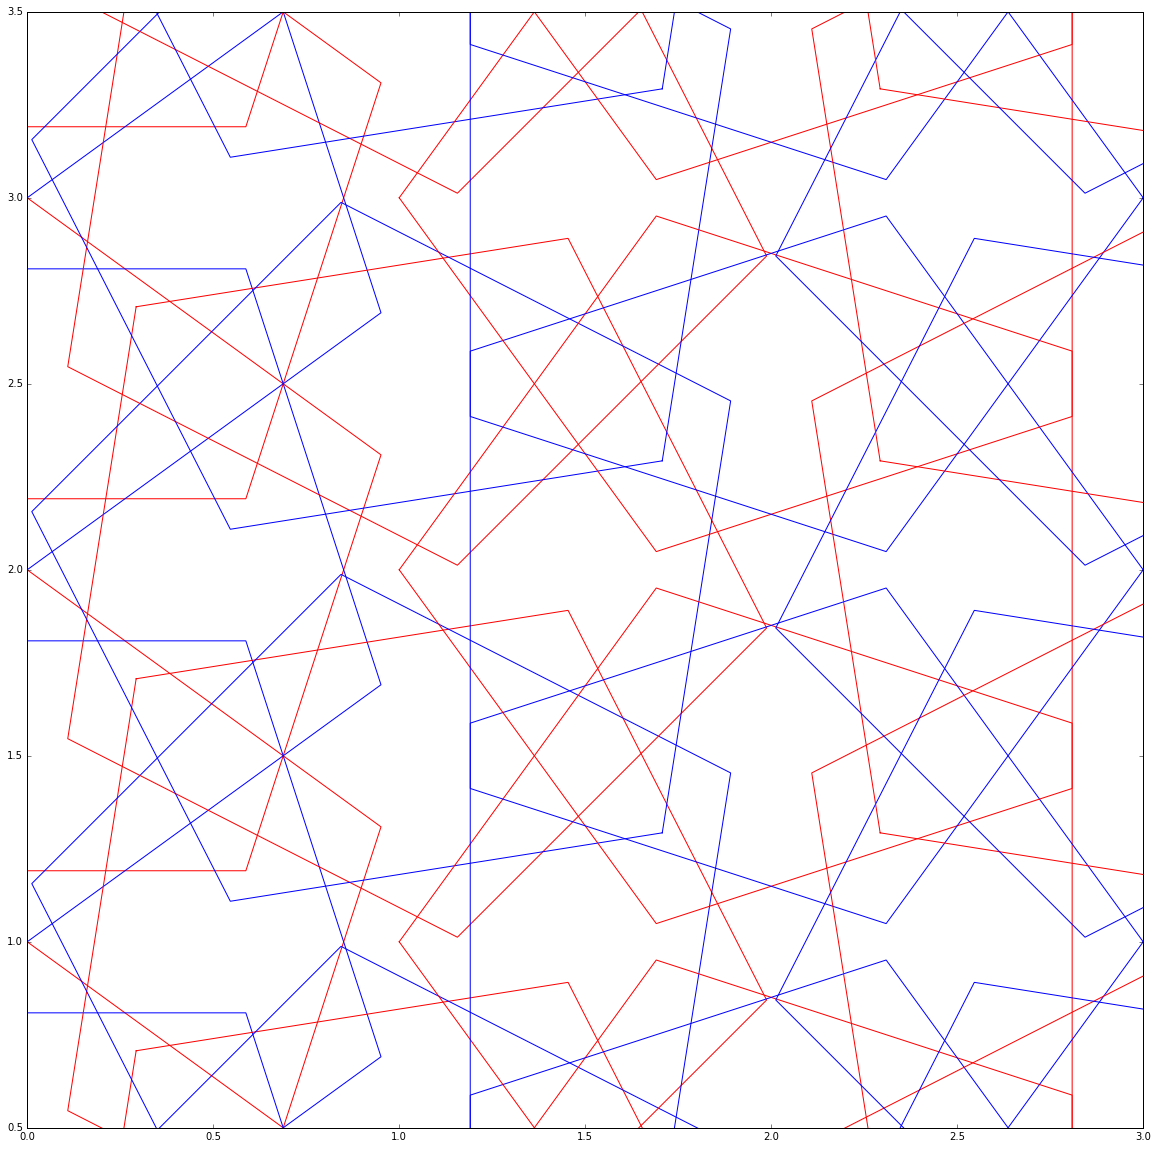

In [115]:
"""Now we can go a bit mad and add some looping to create a pattern
   We'll be composing matrix and translations into one matrix"""

plt.figure(1,figsize=(20, 20))
tY = 1
tX = 1
iterations = 6

for i in range(iterations):
    for j in range(iterations):
        #theta = i * np.radians(float(360)/iterations)
        theta = i*np.radians(45)
        c,s = np.cos(theta), np.sin(theta)
        R = np.matrix([[c,s,0],[-s,c,0],[0,0,1]])
        T = np.matrix([[1,0,0],[0,1,0],[tY*i,tX*j,1]])
        C = R*T
        sP = shape_pts_P*C
        sF = shape_pts_flip*C
        plt.plot(sP[:,0], sP[:,1],'r-')
        plt.plot(sF[:,0], sF[:,1],'b-')
plt.axis('equal')
plt.axis([0,iterations/2,1,iterations/2])
plt.show()

